# Evaluating Regression Models

Now that we've learned the basic form of a linear regression, let's talk about how to actually evaluate a model's quality. In this notebook, we also get a quick introduction to creating regression models with sci-kit learn. 

---
So two simple learning goals:

1. Quick introduction to fitting linear regressions with sci-kit learn  
2. Understand core regression **evaluation metrics**: R^2, RMSE 

---

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

# Load the data in
df = pd.read_table('https://stats.idre.ucla.edu/wp-content/uploads/2016/02/p054.txt')
df.columns = df.columns.str.strip()

# Take a look at the data: all numeric
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [5]:
df.shape

(30, 7)

In [22]:
features, target = ['X1','X2','X3'], 'Y'
X, y = df[features], df[target]

lm = LinearRegression() # construct LinearRegression model object
lm.fit(X, y) #fit model to our choice of features

LinearRegression()

Having fit our model, we can extract information about it from the model object. For example, we can check out it's intercept and feature coefficients:

In [23]:
# extract feature coefficients and intercept from fit model
print(lm.intercept_)
print(lm.coef_)

11.258305132565361
[ 0.68241648 -0.10328426  0.23797624]


Recall that this means the model we've fit is given by:

$$y_{pred} = f(x) = 11.25 + 0.68x_1 -.10x_2 + .24x_3$$

We can also use the model object to make predictions, then plot our actual y values vs. the predictions:

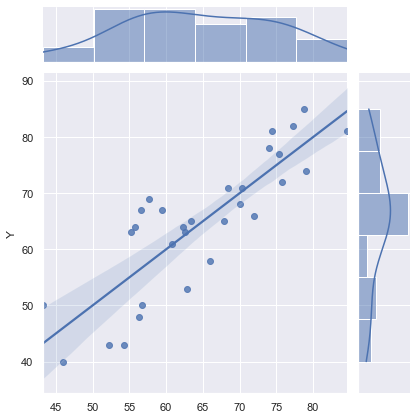

In [25]:
preds = lm.predict(X) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')

## SSE, RMSE, and MAE

But how well does this model fit the data? By looking at the plot, the visual answer is *pretty well*. But there are a number of ways to quantify this (note that the above is **not** a plot of the target vs. some feature *x*, but instead is a plot of actual vs. predicted values, which we'd like to be a perfectly straight line of 1-1 correspondence if possible).

A first way would be to explicitly calculate what the model's cost function is concerned with, i.e. sum of the squared errors, often abbreviated **SSE (sum of squared errors)**:

In [26]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y,preds)

1224.6163806588245

Well this number seems a bit large and abstract. If we wanted to relate this back to the original scale of the target we're predicting, here's a great way to do it: First divide SSE by # observations (i.e. the mean), then take the square root of that. The mean gets us back to thinking on a per observation basis, and the root gets us from $units^2$ back to our original $units$. The resulting metric is called **Root Mean Squared Error (RMSE)**. 

In [27]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y,preds)

6.389095868897321

**Mean Absolute Error (MAE)** is another evaluation metric in the original units of the target variable. 

In [28]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

5.499953329299026

So we have a tendency to miss our target by about 6 units, not terrible!

## R-squared

Another metric that is often used for linear regression: $R^2$, or the *coefficient of determination*. The idea behind this metric is to measure the target "variance explained" by the model. The target has intrinsic variance from its mean $\overline{y}$ given by $\sum_{i=1}^{n} (y_i - \overline{y})^2$ which we call *SST* (sum of the squares total), and we then think of the ratio $SSE/SST$ as the % of variance that remains once we've modeled the data. Since we want *% variance explained* we take the difference between 1 and this ratio:  

$$R^2 = 1 - SSE/SST$$

If the model predicts perfectly, $SSE = 0$ so $R^2 = 1$. On the other hand, if we have a constant model that predicts the mean for all inputs, $SSE=SST$, so $R^2 = 0$. This gives us arguably the clearest way to understand **$R^2$ : it measures how good our regression fit is relative to a constant model that predicts the mean**.

(Word to the wise: $R^2$ is guaranteed to be positive on *training data*, but could possibly be negative on unseen data if we overfit so badly that predicting the mean would have been better!) 

In [29]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

0.7150044494972055

$R^2$ is usually the default metric people use to evaluate regression models. In fact, the sklearn model uses it as the scoring default. The function `score(X,y)` below makes predictions on X and evaluates them against y:

In [30]:
lm.score(X,y)

0.7150044494972055

All of these evaluations were done on the training data, so they are likely overly optimistic. Usually we also want to also evaluate our models on validation and/or test sets that the model hasn't already seen. We'll get to that in detail soon :)

## **Recap** 

Sklearn syntax is very standardized across many different types of models. Here are the core functions / attributes we saw:

*Functions*:

In [31]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X, y) #fit model to features X, target y

lm.predict(X) # generate predictions for X using fit model
lm.score(X,y) # score predictions on X against ground truth target y, using fit model

0.7150044494972055

*Attributes of fit model*:

In [32]:
# extract feature coefficients and intercept from fit model
print(lm.intercept_)
print(lm.coef_)

11.258305132565361
[ 0.68241648 -0.10328426  0.23797624]


Note: RMSE and MAE are also built into sklearn, so you don't need to write your own functions going forward

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

In [36]:
print(rmse)
print(mae)

6.389095868897321
5.499953329299024
